In [103]:
import pandas as pd
import re
import string
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [104]:
#load dataset
fake = pd.read_csv('Fake (1).csv')
true = pd.read_csv('True (1).csv')

In [105]:
#Add labels
fake['class'] =0 #FAKE news
true['class'] =1 # REAL news

In [106]:
# Combine datasets & shuffle
data = pd.concat([fake, true], axis=0).sample(frac=1, random_state=42)  
data = data.drop(["title", "subject", "date"], axis=1).reset_index(drop=True)

In [107]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)  # Remove text inside brackets
    text = re.sub(r"\W", " ", text)  # Remove non-word characters
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # Remove URLs
    text = re.sub(r"<.*?>+", "", text)  # Remove HTML tags
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)  # Remove punctuation
    text = re.sub(r"\n", " ", text)  # Remove newlines
    text = re.sub(r"\w*\d\w*", "", text)  # Remove words with numbers
    return text

data["text"] = data["text"].apply(clean_text)

In [108]:
# Splitting the dataset
x = data["text"]
y = data["class"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)


In [109]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, max_features=5000)
xv_train = vectorizer.fit_transform(xtrain)
xv_test = vectorizer.transform(xtest)

In [110]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(xv_train, ytrain)

LogisticRegression(max_iter=500)

In [111]:
# Evaluate Logistic Regression
y_pred_lr = lr.predict(xv_test)
lr_acc = accuracy_score(ytest, y_pred_lr)  # FIXED: Defined before use

print("Logistic Regression Accuracy:", lr_acc)
print(classification_report(ytest, y_pred_lr))

Logistic Regression Accuracy: 0.9832516703786192
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5863
           1       0.98      0.99      0.98      5362

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [112]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, n_jobs=-1)
rf_model.fit(xv_train, ytrain)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       n_jobs=-1)

In [113]:
# Evaluate Random Forest
y_pred_rf = rf_model.predict(xv_test)
rf_acc = accuracy_score(ytest, y_pred_rf)  # FIXED: Defined before use

print("Random Forest Accuracy:", rf_acc)
print(classification_report(ytest, y_pred_rf))

Random Forest Accuracy: 0.9716703786191537
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5863
           1       0.96      0.98      0.97      5362

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



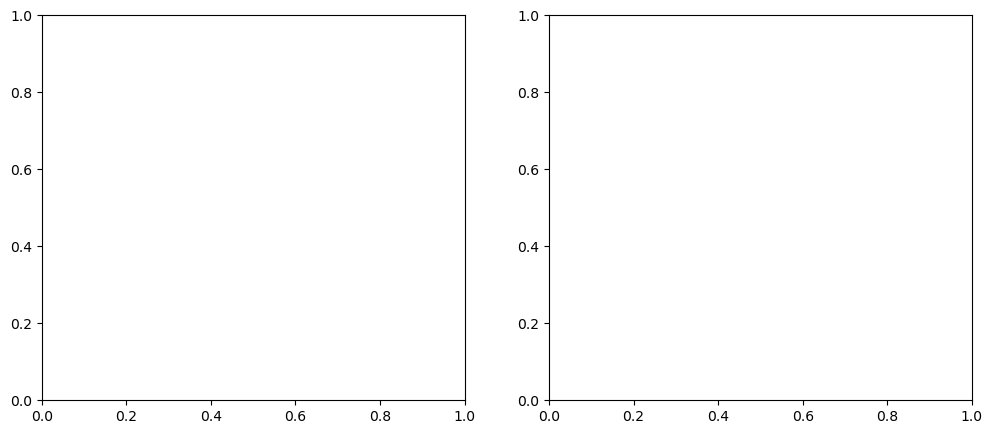

In [114]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


In [115]:
# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(ytest, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")


Text(120.72222222222221, 0.5, 'True Label')

In [116]:
# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(ytest, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

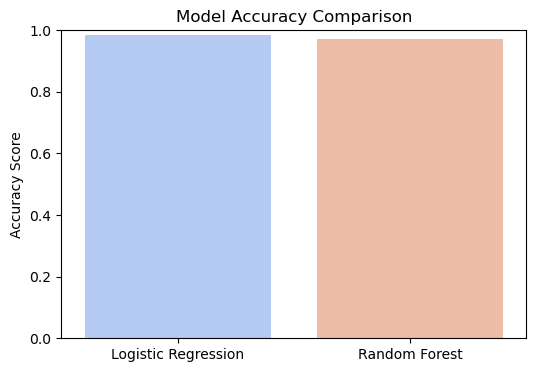

In [117]:
# Bar Chart for Accuracy Comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=["Logistic Regression", "Random Forest"], y=[lr_acc, rf_acc], palette="coolwarm")
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()

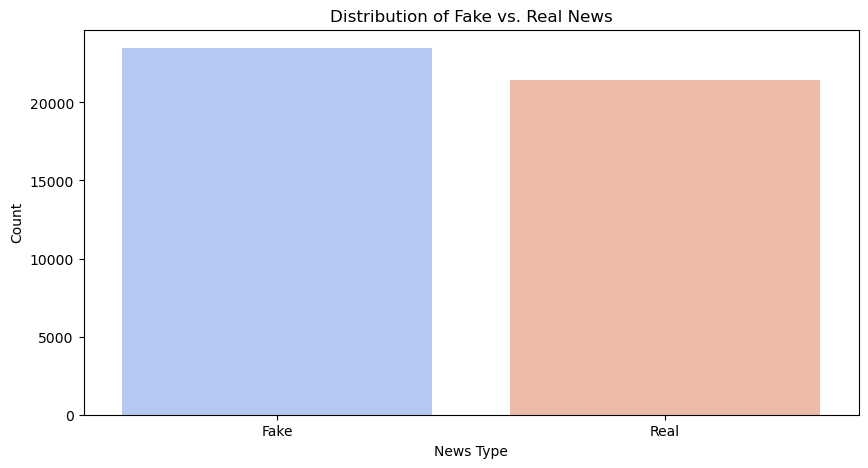

In [118]:
# Bar plot of Fake vs. Real News distribution
plt.figure(figsize=(10,5))
sns.countplot(x=data['class'], palette='coolwarm', order=[0,1])
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.title("Distribution of Fake vs. Real News")
plt.show()

In [119]:
# Save models
joblib.dump(vectorizer, "vectorizer.jb")
joblib.dump(lr, "lr_model.jb")
joblib.dump(rf_model, "rf_model.jb")

['rf_model.jb']